In [6]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

/home/saulius/.virtualenvs/scientific-py3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [7]:
from pyqtree import Index

In [8]:
import string
random = np.random.RandomState(11116)
n_points = 30
data = random.randn(n_points, n_points)

def random_word(length):
    letters = list(string.ascii_lowercase)
    letters_and_spaces = letters + [' ']
    
    if length < 3:
        label = ''.join(random.choice(letters, size=length))
    else:
        label = random.choice(letters)
        # allow spaces but not in first or last letter
        label += ''.join(random.choice(letters_and_spaces, size=length - 2))
        label += random.choice(letters)
        
    return label    

min_length = 5
max_length = 20 

labels = list(map(random_word, random.randint(min_length, max_length+1, size=n_points)))


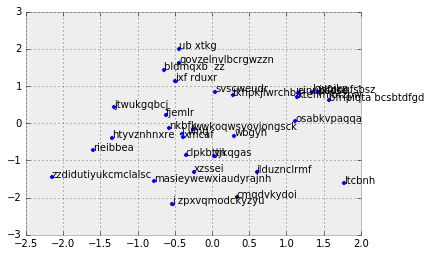

In [16]:
import itertools


plt.figure()

ax = plt.gca()

ax.scatter(data[0], data[1])
renderer = ax.get_figure().canvas.get_renderer()
texts = []
anchors = []
for x, y, label in zip(data[0], data[1], labels):
    anchors.append(np.array([x, y]))
    texts.append(plt.text(x, y, label))
    
bboxes = [t.get_window_extent(renderer).transformed(ax.transData.inverted()) for t in texts]

min_x = np.inf
max_x = -np.inf
min_y = np.inf
max_y = -np.inf

for x0, y0, x1, y1 in map(lambda x: x.get_points().ravel(), bboxes):
    
    min_x = min(min_x, x0)
    max_x = max(max_x, x1)
    
    min_y = min(min_y, y0)
    max_y = max(max_y, y1)


In [12]:
index = Index((min_x, min_y, max_x, max_y))

for i, bbox in enumerate(bboxes):
    index.insert(i, bbox.get_points().ravel())
    

In [13]:
bboxes[0]

Bbox([[0.2820881240670965, 0.7015094234317996], [1.2183784466477423, 0.9724771653672839]])

In [15]:
seen_intersections = set()

total_area = 0

for i, bbox in enumerate(bboxes):
    js = index.intersect(bbox.get_points().ravel())
    
    for j in js:
        if (j,i) not in seen_intersections:
            
            seen_intersections.add((i, j))
            seen_intersections.add((j, i))
            
            

{0, 17, 18, 25}

In [ ]:
index.